In [ ]:
#conectar con base de datos sql server y probando la conexion con una consulta
import pyodbc
SERVER = 'nameServer'
DATABASE = 'banking_case'
USERNAME = 'Mili'
PASSWORD = 'password'
connectionString = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={SERVER};DATABASE={DATABASE};UID={USERNAME};PWD={PASSWORD}'
conn = pyodbc.connect(connectionString) 

query= "select top 10 * from Customer"
cursor = conn.cursor()
cursor.execute(query)
resultado= cursor.fetchall()

In [37]:
#Leer los datos de la tabla en un dataframe y cerrar conexion
import pandas as pd
query= "select * from Customer"
df= pd.read_sql(query, conn)
conn.close()

In [39]:
df.head(5)

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [40]:
#importando las librerias restantes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [42]:
#conocer la cantidad de filas y columnas
df.shape

(3000, 25)

In [43]:
#informacion del dataframe, si se aceptan null, y tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [47]:
#describe de los campos numericos
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [53]:
#segmentar por categorias el Estimated Income
#el maximo umbral es el infinito
bin=[0,100000,300000, float('inf')]
lbs=['Low','Med','High']
#right = False no incluye el valor derecho del borde
df['Income Band'] = pd.cut(df['Estimated Income'], bins=bin ,labels=lbs, right= False)

<AxesSubplot:xlabel='Income Band'>

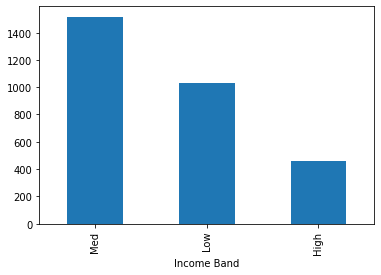

In [61]:
#agrupa y cuenta
df['Income Band'].value_counts().plot(kind= 'bar', xlabel= 'Income Band')

## Variable Analysis

In [65]:
#Examinar la distribución de categorías únicas en columnas categóricas
categorical_cols= df[['BRId','IAId','GenderId','Amount of Credit Cards', 'Nationality', 'Occupation','Fee Structure','Loyalty Classification','Properties Owned','Risk Weighting','Income Band']].columns

In [74]:
for column in categorical_cols:
    print (f"Value Counts for {column}")
    display(df[column].value_counts(ascending=False))

Value Counts for BRId


3    1352
1     660
2     495
4     493
Name: BRId, dtype: int64

Value Counts for IAId


2     177
4     177
3     177
1     177
8     177
10    176
12    176
14    176
15    176
13    176
11    176
9     176
7      89
5      89
6      89
22     88
20     88
18     88
16     88
17     88
19     88
21     88
Name: IAId, dtype: int64

Value Counts for GenderId


2    1512
1    1488
Name: GenderId, dtype: int64

Value Counts for Amount of Credit Cards


1    1922
2     765
3     313
Name: Amount of Credit Cards, dtype: int64

Value Counts for Nationality


European      1309
Asian          754
American       507
Australian     254
African        176
Name: Nationality, dtype: int64

Value Counts for Occupation


Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: Occupation, Length: 195, dtype: int64

Value Counts for Fee Structure


High    1476
Mid      962
Low      562
Name: Fee Structure, dtype: int64

Value Counts for Loyalty Classification


Jade        1331
Silver       767
Gold         585
Platinum     317
Name: Loyalty Classification, dtype: int64

Value Counts for Properties Owned


2    777
1    776
3    742
0    705
Name: Properties Owned, dtype: int64

Value Counts for Risk Weighting


2    1222
1     836
3     460
4     322
5     160
Name: Risk Weighting, dtype: int64

Value Counts for Income Band


Med     1517
Low     1027
High     456
Name: Income Band, dtype: int64

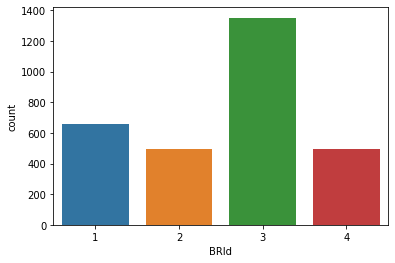

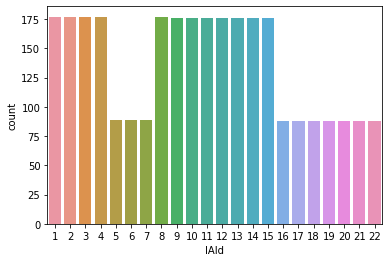

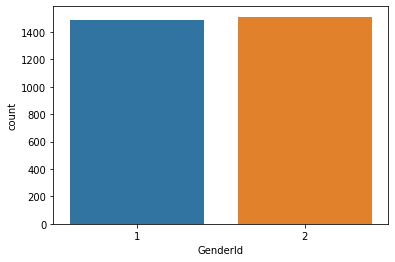

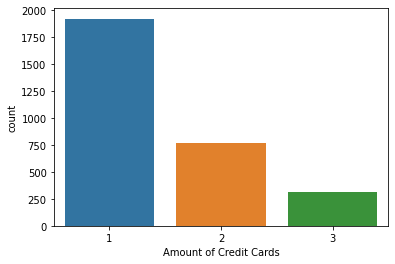

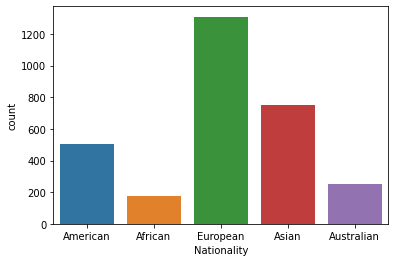

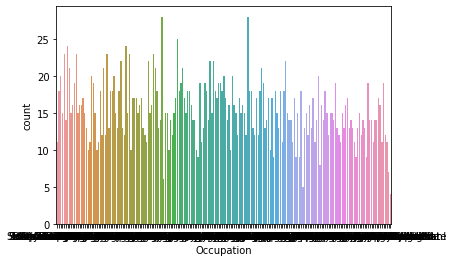

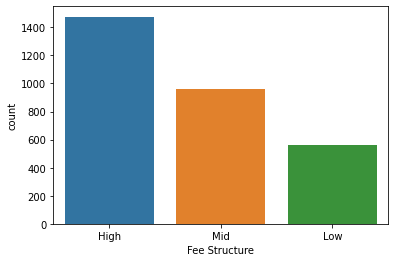

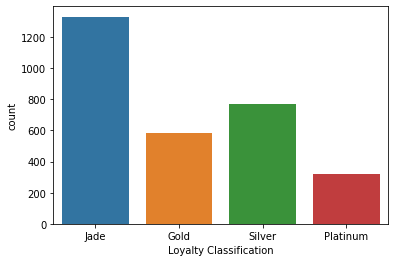

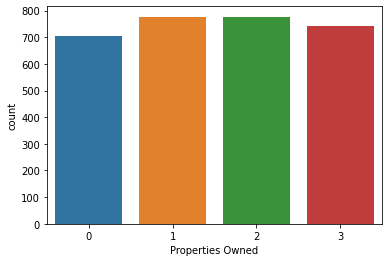

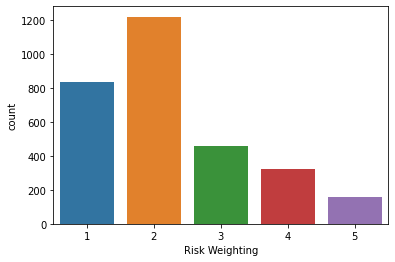

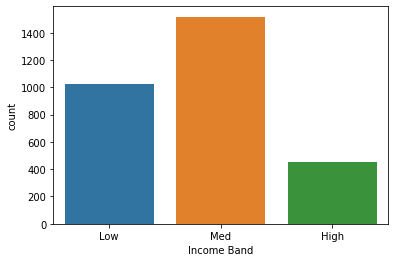

In [79]:
#genera count value para cada columna de la variable
for i, col  in enumerate(categorical_cols):
    plt.figure(i)
    sns.countplot(data = df, x = col)

## Bivariate Analysis

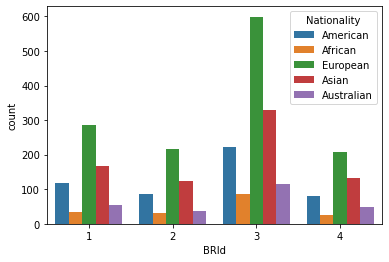

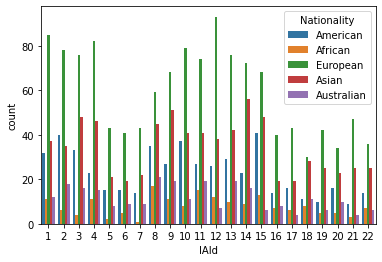

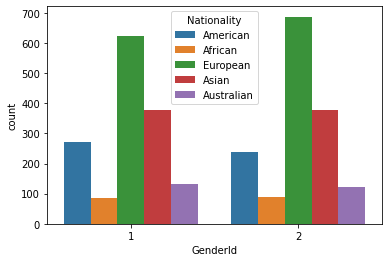

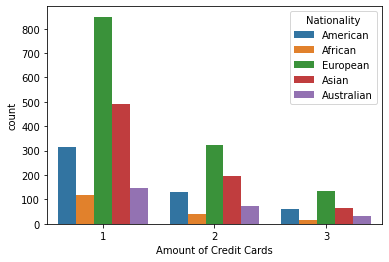

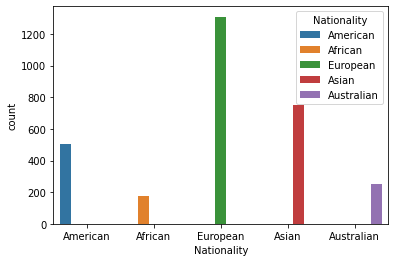

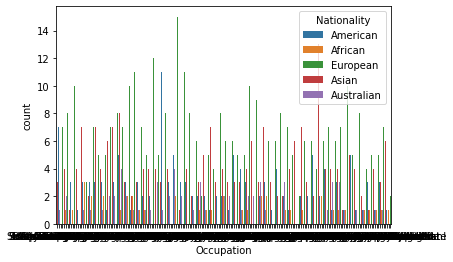

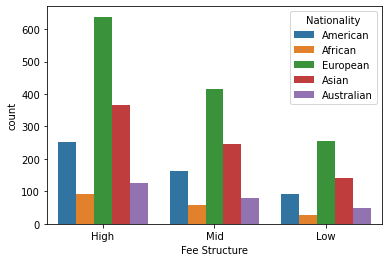

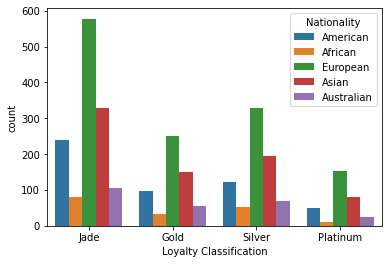

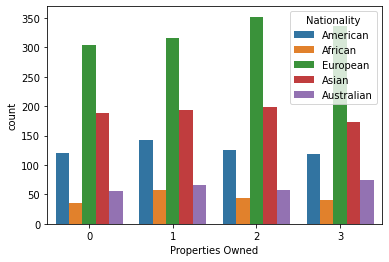

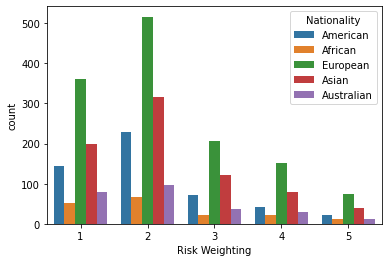

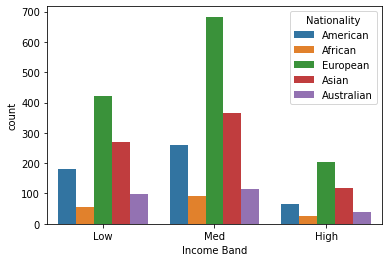

In [83]:
#genera count value para cada columna de la variable,pero enfocado al campo gender por cada columna
for i, colum in enumerate (categorical_cols):
    plt.figure(i)
    sns.countplot(data= df, x= colum, hue = "Nationality")

## Rencuento de campos categoricos

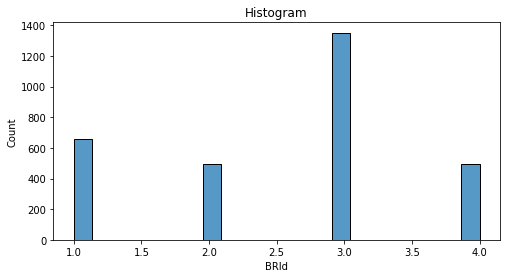

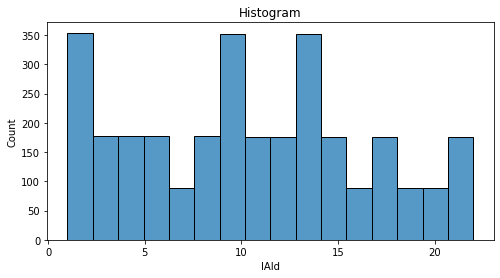

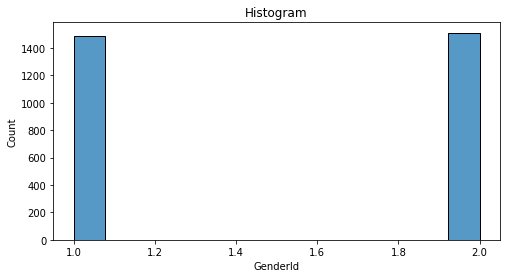

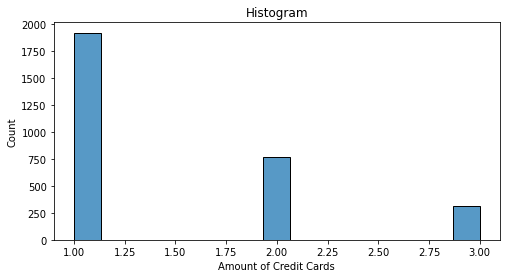

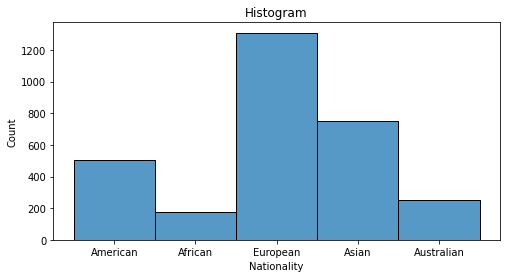

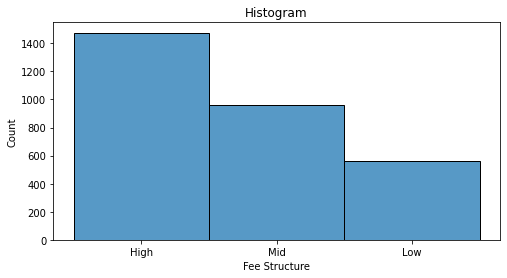

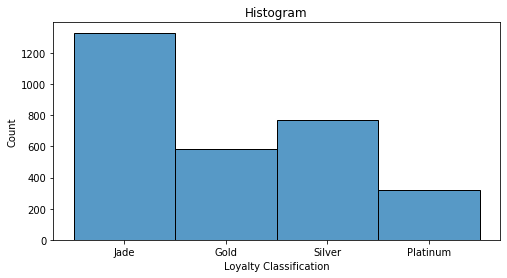

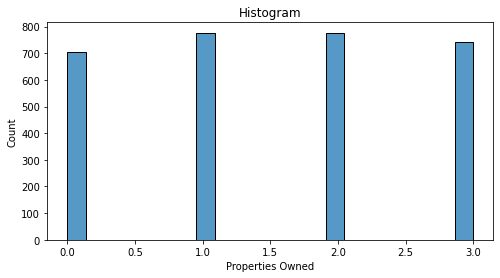

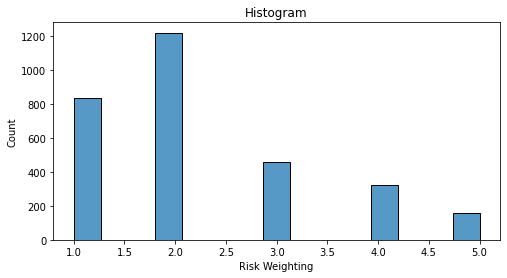

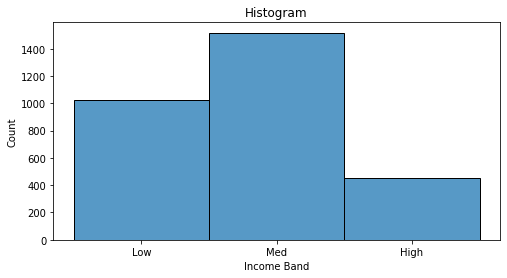

In [87]:
# Histplot para vontar valores diferentes a ocupacion
for col in categorical_cols:
    if col == 'Occupation':
        continue
    plt.figure(figsize=(8,4))
    sns.histplot(df[col])
    plt.title("Histogram")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

## Analisis numerico

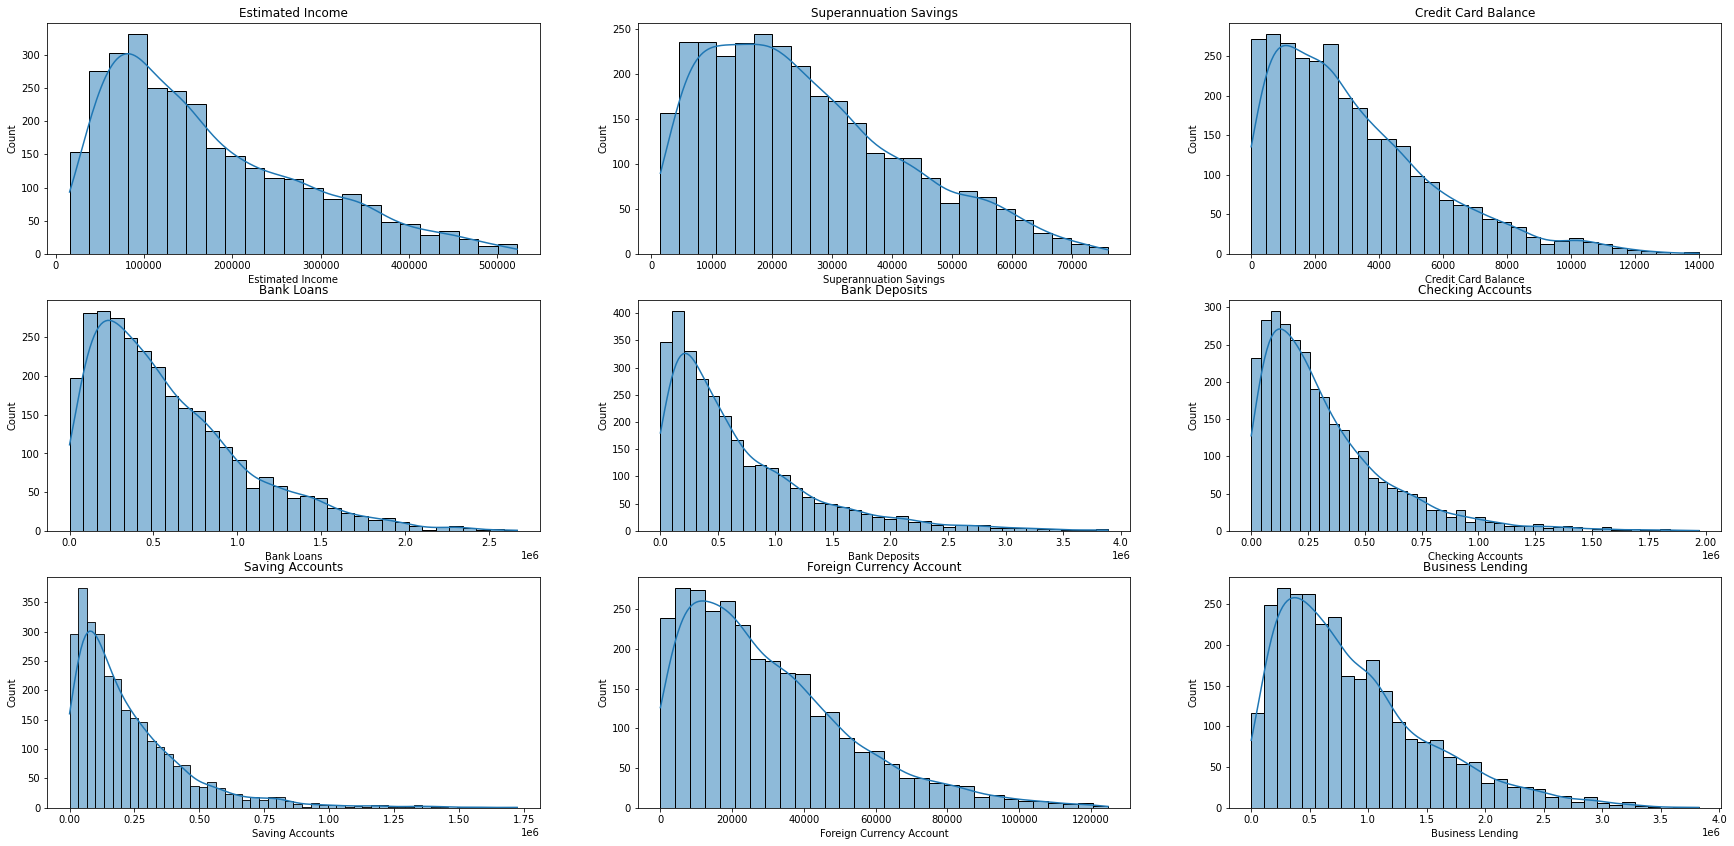

In [110]:
numerical_cols=['Estimated Income','Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits','Checking Accounts','Saving Accounts','Foreign Currency Account','Business Lending']
#análisis univariado y visualización
plt.figure(figsize=(30,45)) #tamaño de la figura ancho, largo
for i, col in enumerate (numerical_cols):
    plt.subplot(len(numerical_cols),3,i+1)  # 2 fila, 1 columnas, gráfico en la posición 1
    sns.histplot(df[col], kde= True) #Se utiliza para crear un histograma y superponer una curva de Estimación de Densidad Kerne
    plt.title(col)
plt.show()

## Heatmaps en columnas numericas

In [112]:
df[numerical_cols].corr()
# correlacion negaiva cuando una variable aumenta la otra disminuye
# correlacion positiva cuando una variable aumenta la otra tambien aumenta
# de mas 0.5 o -0.5 se considera que hay una correlacion 

,Estimated Income,Superannuation Savings,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending
Estimated Income,1.000000,0.374802,0.298527,0.329926,0.260332,0.291412,0.261299,0.306999,0.328531
Superannuation Savings,0.374802,1.000000,0.225562,0.241457,0.174084,0.198188,0.177132,0.228103,0.264919
Credit Card Balance,0.298527,0.225562,1.000000,0.369509,0.383877,0.298672,0.284696,0.357720,0.351063
Bank Loans,0.329926,0.241457,0.369509,1.000000,0.373155,0.292082,0.268882,0.364391,0.417095
Bank Deposits,0.260332,0.174084,0.383877,0.373155,1.000000,0.844278,0.754744,0.406347,0.441298
Checking Accounts,0.291412,0.198188,0.298672,0.292082,0.844278,1.000000,0.459509,0.312651,0.355904
Saving Accounts,0.261299,0.177132,0.284696,0.268882,0.754744,0.459509,1.000000,0.311465,0.307550
Foreign Currency Account,0.306999,0.228103,0.357720,0.364391,0.406347,0.312651,0.311465,1.000000,0.369749
Business Lending,0.328531,0.264919,0.351063,0.417095,0.441298,0.355904,0.307550,0.369749,1.000000


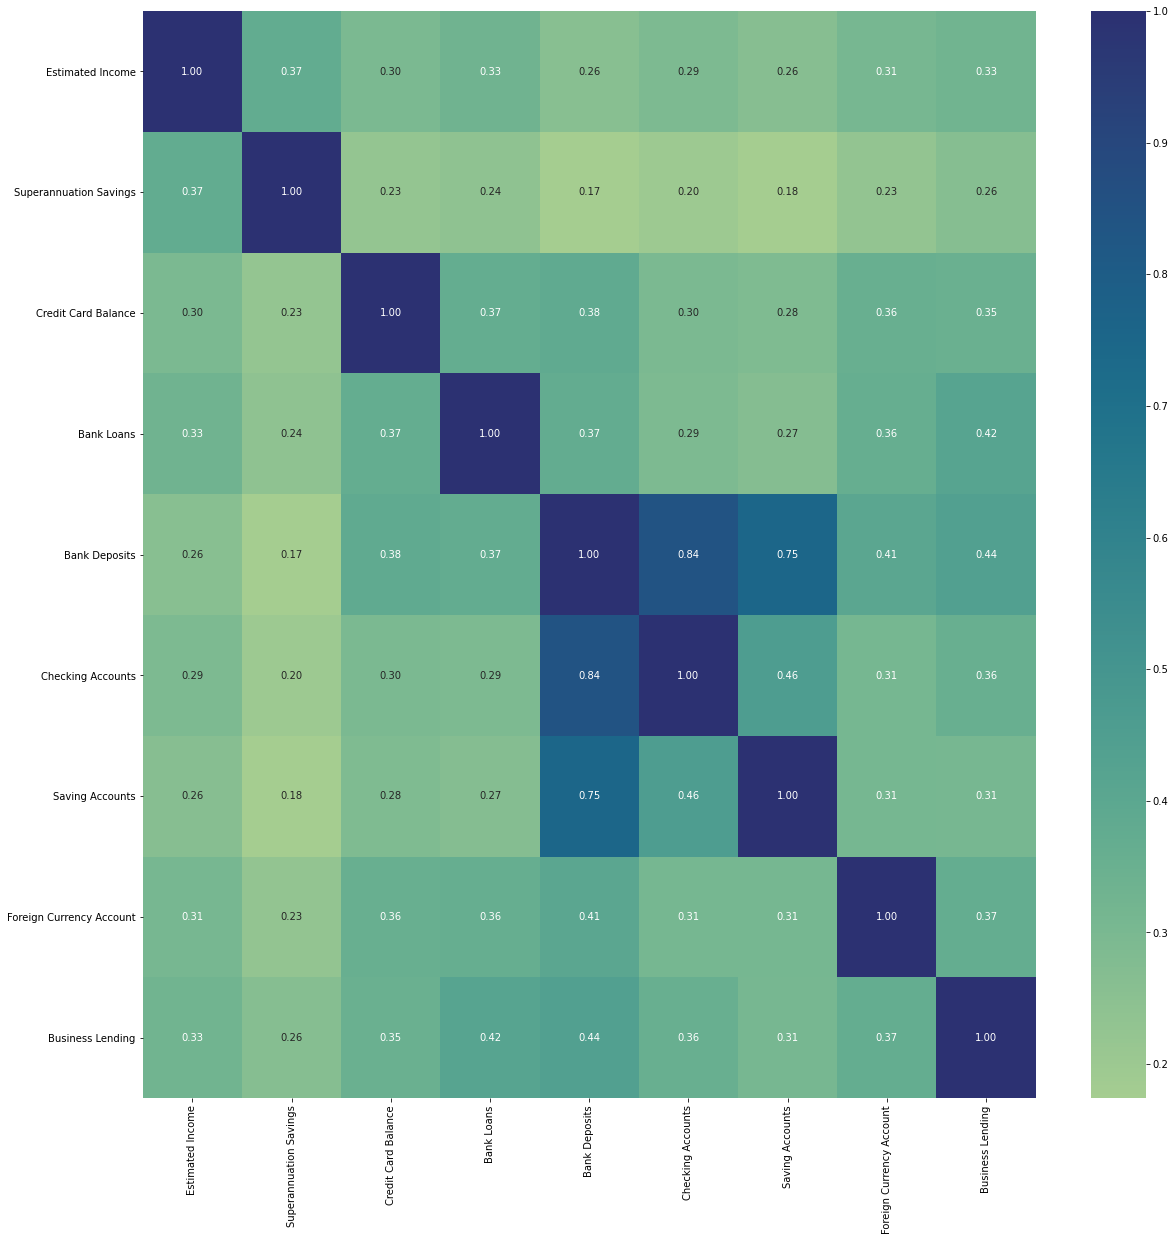

In [116]:
#verlo en mapa de calor
plt.figure (figsize = (20,20))
#cmap es el estilo, annot True para que se vea los valores, fmt = para que los valores se vean un formato 'd' entero y decimal '.2f'
sns.heatmap(data=df[numerical_cols].corr(), cmap= 'crest', annot= True, fmt= '.2f')
plt.show()

In [ ]:
# Cuentas Corrientes y Depósitos Bancarios: A medida que aumenta el número de cuentas corrientes, también tienden a aumentar los depósitos en el banco. Esto puede sugerir que las personas con cuentas corrientes tienden a tener más fondos disponibles para depositar.
# Cuentas de Ahorro y Depósitos Bancarios: De manera similar, un aumento en las cuentas de ahorro se asocia con un aumento en los depósitos. Esto podría indicar que los individuos que ahorran más también están depositando más dinero en el banco.
# Monedas extranjera y Depósitos Bancarios: Esto puede indicar que los clientes que utilizan cuentas de moneda extranjera también tienden a tener más fondos disponibles para depositar.